<center><h1>Hong_Seungil_HW2</h1></center>
<br>
<br>

Name: Seungil Hong
<br>
Github Username: zonna19
<br>
USC ID: 2375832093

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [1]:
'''pip install pandas pyexcel-ods''' # Use Terminal and type : pyexcel-ods lib installation if required!
import pandas as pd
import numpy as np
import pyexcel_ods
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from scipy import stats
from builtins import range

Get the Cycle Power Plant Data Set

In [2]:
# Load data from the Folds5x2_pp.ods file, its gonna take about 1 min
data = pyexcel_ods.get_data('../data/CCPP/Folds5x2_pp.ods')

In [3]:
# data to a Pandas DataFrame
ccpp_df = pd.DataFrame(data['Sheet1'])  # Replace 'Sheet1' with the actual sheet name in your .ods file

ccpp_df.columns = ccpp_df.iloc[0] # take the first row as column names
ccpp_df = ccpp_df[1:] #drop the first row

ccpp_df

,AT,V,AP,RH,PE
1,14.96,41.76,1024.07,73.17,463.26
2,25.18,62.96,1020.04,59.08,444.37
3,5.11,39.4,1012.16,92.14,488.56
4,20.86,57.32,1010.24,76.64,446.48
5,10.82,37.5,1009.23,96.62,473.9
...,...,...,...,...,...
9564,16.65,49.69,1014.01,91,460.03
9565,13.19,39.18,1023.67,66.78,469.62
9566,31.32,74.33,1012.92,36.48,429.57
9567,24.48,69.45,1013.86,62.39,435.74


### Start from here for debug, importing data takes long time.

### (b) Exploring the data

#### i. rows and columns

In [4]:
print("Number of Rows : ", len(ccpp_df))
print("Number of Columns : ", len(ccpp_df.columns))

Number of Rows :  9568
Number of Columns :  5


Rows representing different sets of data in certain amibient conditions, Columns are independent data to figure out what effects PE (dependant) with different variables.

#### ii. pairwise scatterplots of all the varianbles

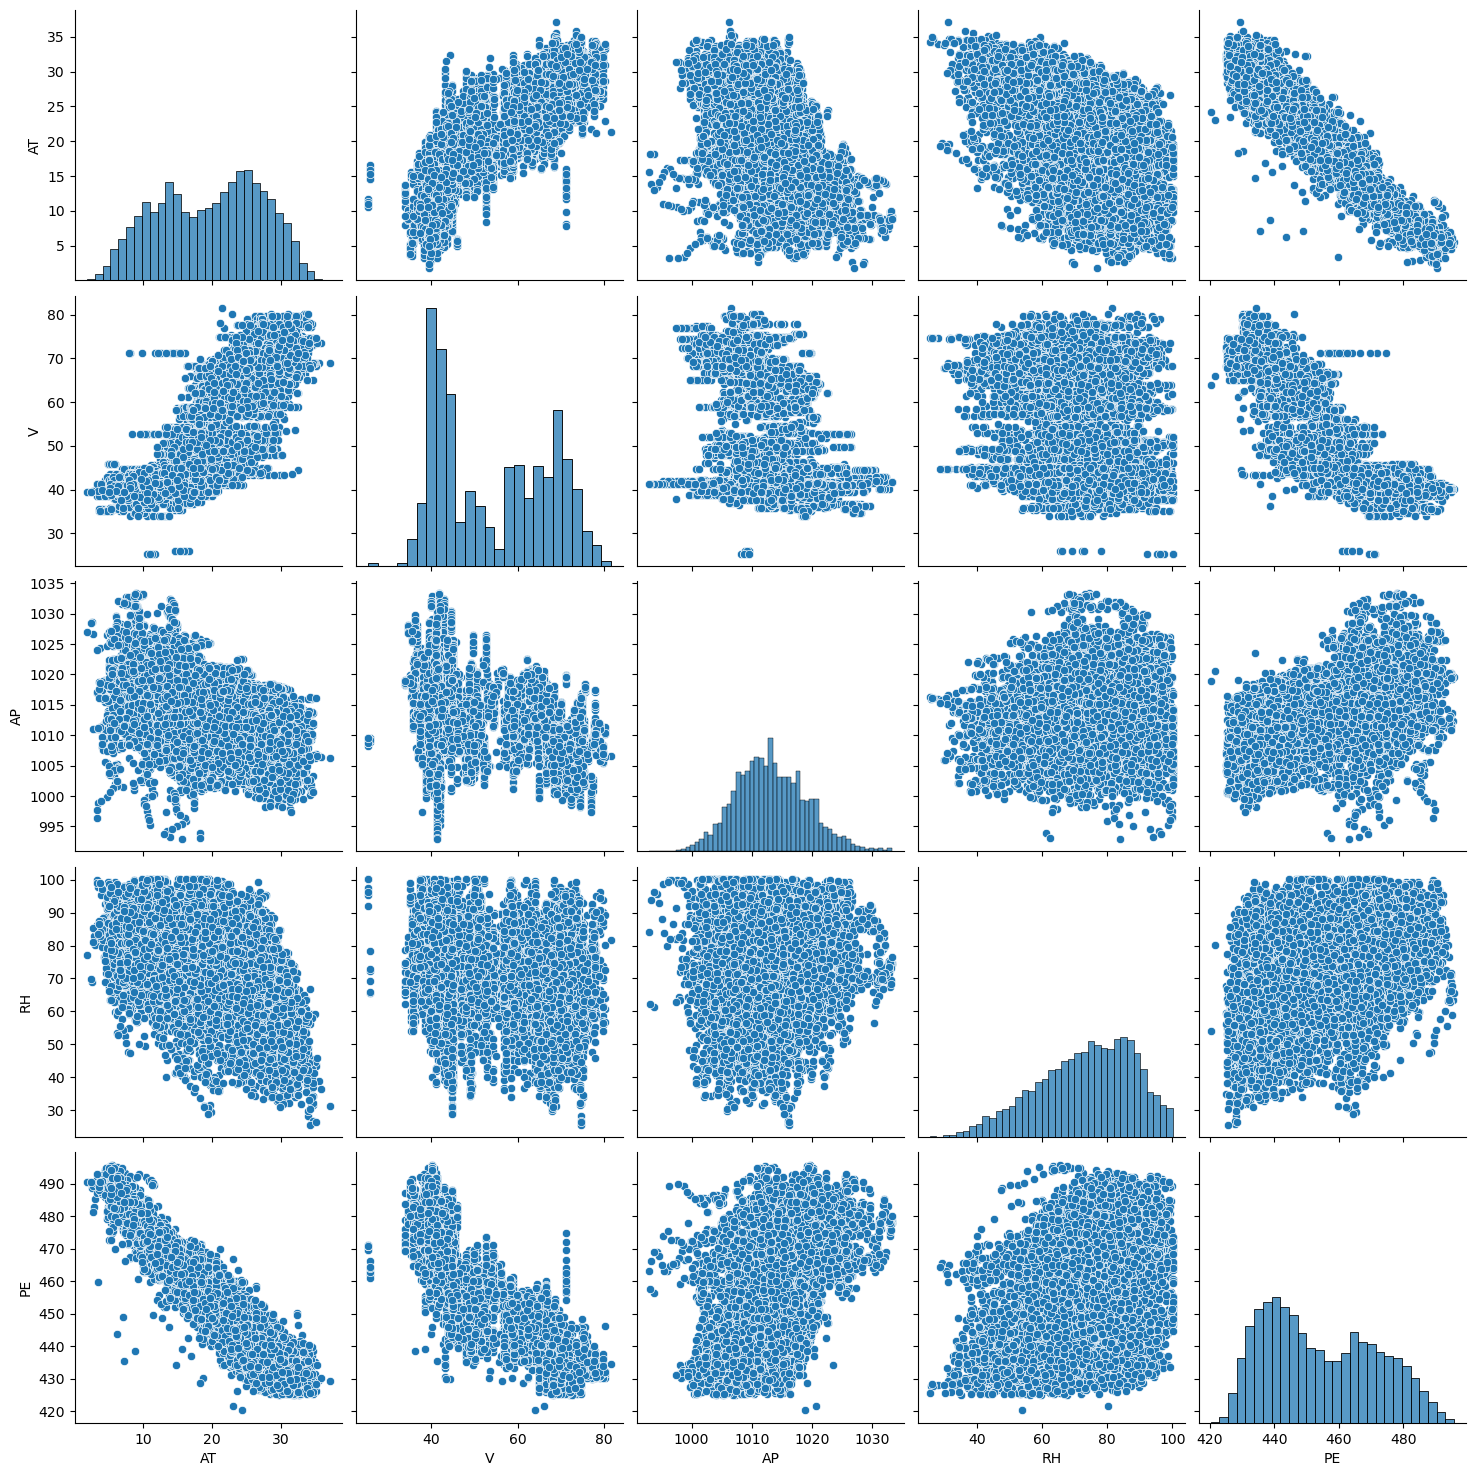

In [5]:
sns.pairplot(ccpp_df, height=3)

Findings: 
1. Strong linear relationship with AT and V to PE. 
2. although two independent variables, V and AT are somehow showing relations.

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [6]:
ccpp_df = ccpp_df.apply(pd.to_numeric, errors='coerce')

In [7]:
mean = ccpp_df.mean()
median = ccpp_df.median()
range = ccpp_df.max() - ccpp_df.min()
q1_val = ccpp_df.quantile(0.25)
q3_val = ccpp_df.quantile(0.75)
iqr_val = q3_val - q1_val

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Range': range,
    'Q1': q1_val,
    'Q3': q3_val,
    'IQR': iqr_val
})

pd.DataFrame(summary_df, index = ['AT', 'V', 'AP', 'RH', 'PE'], \
                   columns = ['Mean', 'Median', 'Range', 'Q1', 'Q3', 'IQR'])

,Mean,Median,Range,Q1,Q3,IQR
AT,19.651231,20.345,35.30,13.5100,25.72,12.2100
V,54.305804,52.080,56.20,41.7400,66.54,24.8000
AP,1013.259078,1012.940,40.41,1009.1000,1017.26,8.1600
RH,73.308978,74.975,74.60,63.3275,84.83,21.5025
PE,454.365009,451.550,75.50,439.7500,468.43,28.6800


### (c) Simple Linear Regression

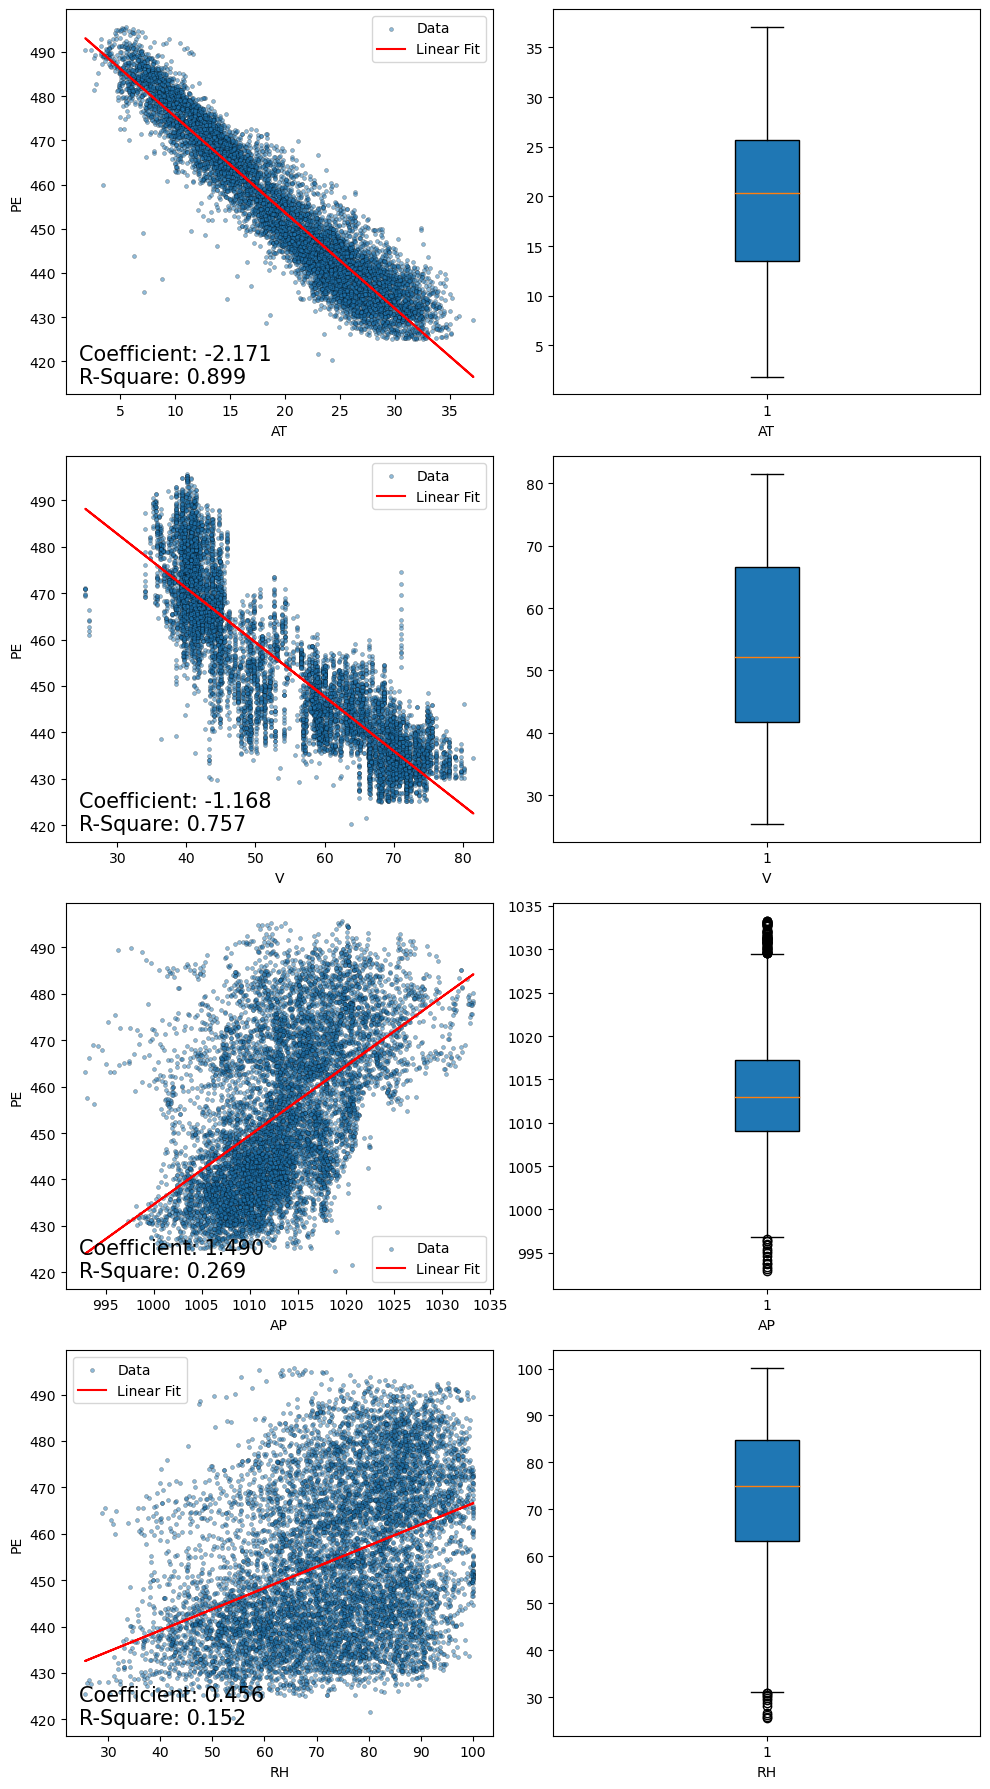

{'AT': -2.1713199585177927, 'V': -1.1681351265557125, 'AP': 1.4898716733991126, 'RH': 0.4556501022629802}


In [8]:
uni_co = {} # for question (e) to store coefficient    

def plot_linear_fit(x_data, y_data, feature_name):
    slope, intercept, r_value, p_value, _ = stats.linregress(x_data, y_data)
    line = slope * x_data + intercept

    # Convert x_data and y_data to numpy arrays
    x_data_np = np.array(x_data)
    y_data_np = np.array(y_data)

    plt.scatter(x_data_np, y_data_np, s=8, label='Data', alpha=0.5, edgecolors='k', linewidths=0.3)
    plt.plot(x_data_np, line, color='red', label='Linear Fit')
    plt.xlabel(feature_name)
    plt.ylabel('PE')
    plt.legend()
    
    # Add coefficient to the plot
    plt.text(0.03, 0.03, f'Coefficient: {slope:.3f}\nR-Square: {r_value**2:.3f}', transform=plt.gca().transAxes, fontsize=15)

def plot_boxplot(x_data, feature_name):
    # Convert x_data to numpy array
    x_data_np = np.array(x_data)
    
    plt.boxplot(x_data_np, patch_artist=True)
    plt.xlabel(feature_name)

def draw_fits():
    fig, axes = plt.subplots(4, 2, figsize=(10, 18))
    features = ['AT', 'V', 'AP', 'RH']

    # Convert y_data to numpy array
    y_data = np.array(ccpp_df['PE'])

    for i, feature_name in enumerate(features):
        # Convert x_data to numpy array
        x_data = np.array(ccpp_df[feature_name])
        
        plt.subplot(4, 2, 2 * i + 1)
        plot_linear_fit(x_data, y_data, feature_name)
        
        plt.subplot(4, 2, 2 * i + 2)
        plot_boxplot(x_data, feature_name)

        uni_co[feature_name] = stats.linregress(x_data, y_data).slope # for question (e)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__": # Start point execution for above functions.
    draw_fits()
    print(uni_co)


1) As answered to the earlier question, AT and V have strong linear relations, whereas AP and RH aren't.
2) Although AP and RH have many outliers, V has some irregulaar datapoints such as around V=70 (or V=15) it showed different PE values at the same V's which seemed do not conform the rest of the data.

### (d) Multiple Regression

In [9]:
import statsmodels.api as sm

ccpp_X = ccpp_df[['AT', 'V', 'AP', 'RH']]
ccpp_X = sm.add_constant(ccpp_X)  # adding intercepts 

ccpp_y = ccpp_df['PE'] #take PE columns to dependent values

# OLS for multiple regression
multimodel = sm.OLS(ccpp_y, ccpp_X).fit()

print(multimodel.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Thu, 21 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:24:59   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

In [10]:
print(multimodel.pvalues)
multi_mse = np.mean(multimodel.resid**2)
print(f"Multivariate Model MSE): {multi_mse:.3f}")

const     0.000000e+00
AT        0.000000e+00
V        4.375305e-215
AP        5.507109e-11
RH       3.104584e-293
dtype: float64
Multivariate Model MSE): 20.767


1. all p-values are relatively small (<0.05) thus, we can reject the null H0 that those predictors do not have significant association. => the model has signification to response.
2. R-squared value is 0.929, it is also showing that this regression model has significant association.

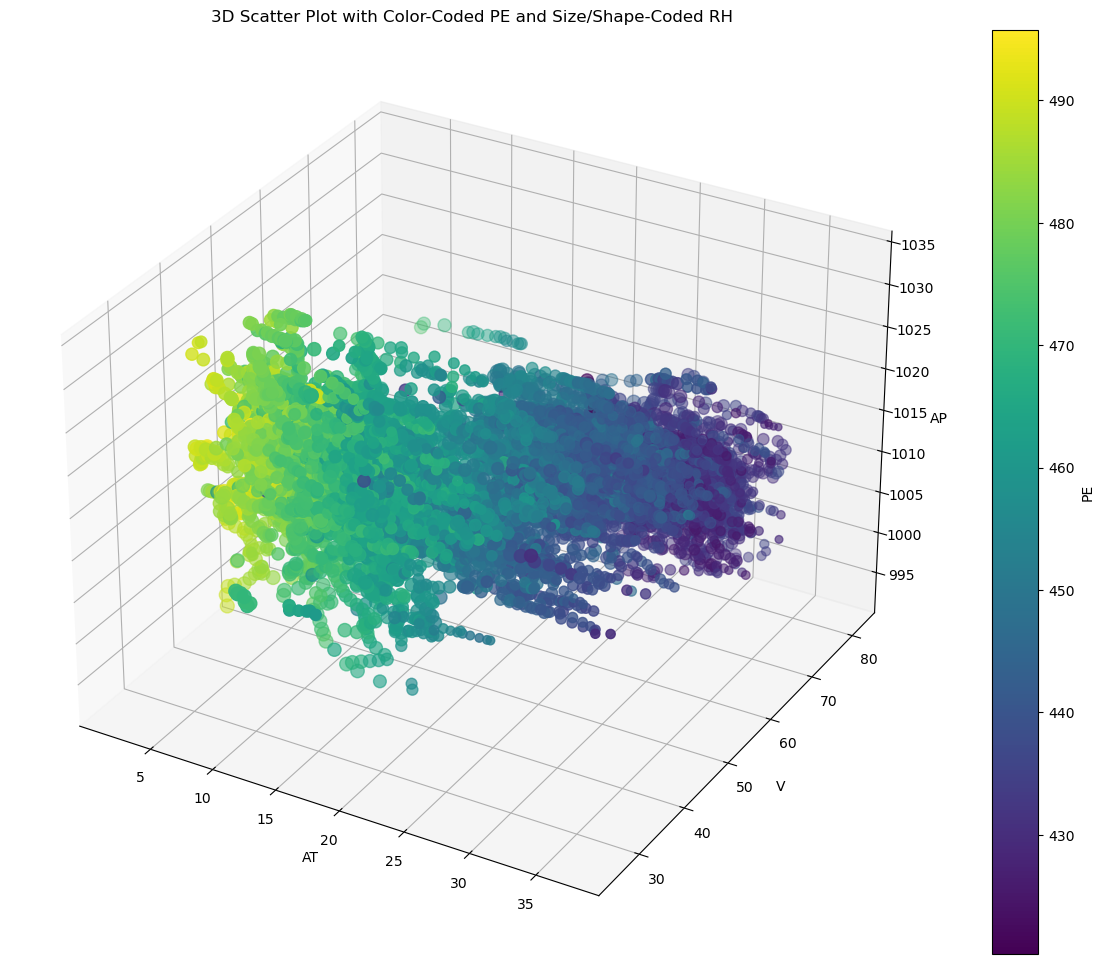

In [11]:
from mpl_toolkits.mplot3d import Axes3D

# for reference creating 4 dimensional representation
x = ccpp_df['AT']
y = ccpp_df['V']
z = ccpp_df['AP']
rh = ccpp_df['RH'] 
pe = ccpp_df['PE'] 

# Create a 3D plot
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

# Note that c is color, s is size
scatter = ax.scatter(x, y, z, c=pe, cmap='viridis', marker='o', s=rh)

# Color description
cbar = plt.colorbar(scatter, label='PE')

ax.set_xlabel('AT')
ax.set_ylabel('V')
ax.set_zlabel('AP')
ax.set_title('3D Scatter Plot with Color-Coded PE and Size/Shape-Coded RH')

plt.show()

### (e) 1c Compare to 1d

In [12]:
multi_co = multimodel.params # getting values
multi_co = multi_co.to_dict()  # to dictionary format for later plotting
multi_co.pop('const') # remove const key for later plotting
print("Coefficients for each features of Multiple regression :","\n", multi_co)

Coefficients for each features of Multiple regression : 
 {'AT': -1.9775131066353921, 'V': -0.2339164225824993, 'AP': 0.062082943780854716, 'RH': -0.15805410291640945}


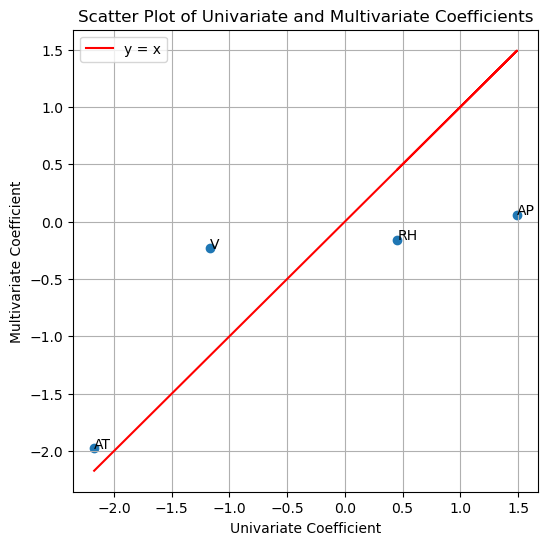

In [13]:
# Extract the values from the dictionaries
uni_co_values = list(uni_co.values())
multi_co_values = list(multi_co.values())

plt.figure(figsize=(6, 6))
plt.scatter(uni_co_values, multi_co_values) # Plot the scatter plot
plt.grid()
plt.xlabel('Univariate Coefficient')
plt.ylabel('Multivariate Coefficient')
plt.title('Scatter Plot of Univariate and Multivariate Coefficients')
plt.annotate(text='AT', xy=(uni_co_values[0], multi_co_values[0]))
plt.annotate(text='V', xy=(uni_co_values[1], multi_co_values[1]))
plt.annotate(text='AP', xy=(uni_co_values[2], multi_co_values[2]))
plt.annotate(text='RH', xy=(uni_co_values[3], multi_co_values[3]))
plt.plot(uni_co_values,uni_co_values, 'r', label = 'y = x')
plt.legend()

plt.show()

They have similiar coefficients from both Univariate regression and multivariate regression. but note 'AP' is showing the most deviated from the two regression types.

### (f) Nonlinear Association

Predictor: AT
R-squared: 0.912
Coefficient:
 const    492.728143
x1        -0.610346
x2        -0.125138
x3         0.002675
dtype: float64
P-Values:
 const     0.000000e+00
x1        7.898147e-07
x2        8.833045e-73
x3       3.652185e-110
dtype: float64 

Predictor: V
R-squared: 0.775
Coefficient:
 const    554.146849
x1        -2.144377
x2        -0.002712
x3         0.000134
dtype: float64
P-Values:
 const    0.000000
x1       0.000025
x2       0.768497
x3       0.013735
dtype: float64 

Predictor: AP
R-squared: 0.275
Coefficient:
 const     0.074694
x1       25.255593
x2       -0.049952
x3        0.000025
dtype: float64
P-Values:
 const    4.502734e-17
x1       4.502735e-17
x2       3.666705e-17
x3       8.264146e-18
dtype: float64 

Predictor: RH
R-squared: 0.154
Coefficient:
 const    468.413536
x1        -1.729211
x2         0.032145
x3        -0.000152
dtype: float64
P-Values:
 const    0.000000
x1       0.000377
x2       0.000009
x3       0.000014
dtype: float64 



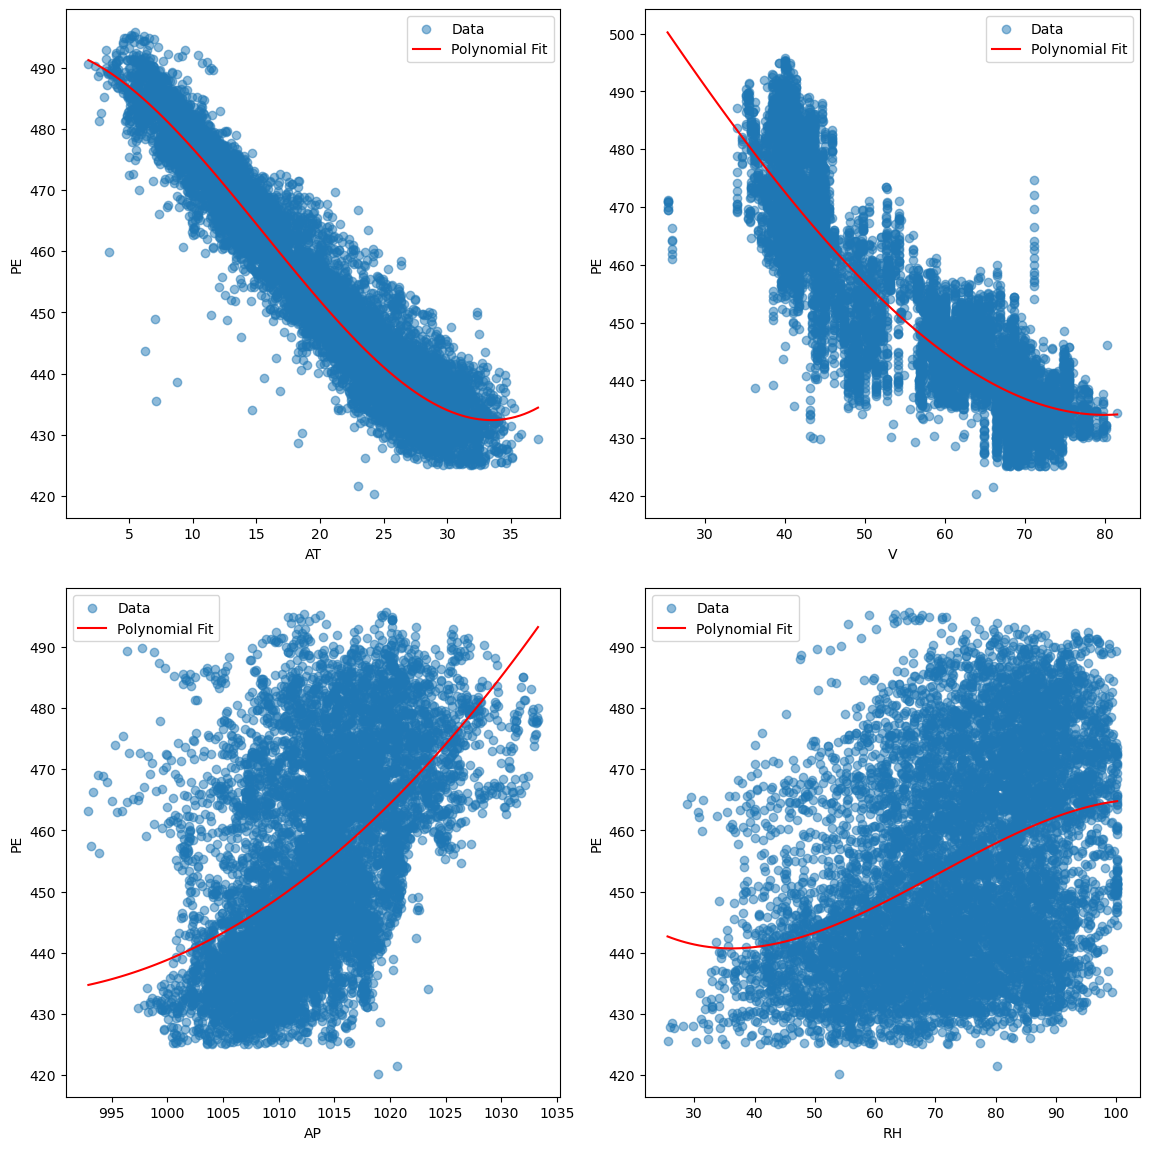

In [14]:
features = ['AT', 'V', 'AP', 'RH']

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.tight_layout(pad=3.0)

for i, f in enumerate(features):

    x_data = ccpp_df[f].values.reshape(-1, 1)
    poly = PolynomialFeatures(degree=3)
    x_data_trans = poly.fit_transform(x_data)
    x_data_trans = sm.add_constant(x_data_trans)  # Add a constant term
    trained_model = sm.OLS(ccpp_y, x_data_trans).fit()
    
    print('Predictor:', f)
    print(f'R-squared: {trained_model.rsquared:.3f}')
    print('Coefficient:\n', trained_model.params)
    print('P-Values:\n', trained_model.pvalues, '\n')
    
    # Scatter plot with polynomial regression line
    ax = axes[i // 2, i % 2]
    ax.scatter(x_data, ccpp_y, label='Data', alpha=0.5)
    
    # Generate the polynomial regression line
    x_pred = np.linspace(x_data.min(), x_data.max(), 100)
    x_pred_trans = poly.transform(x_pred.reshape(-1, 1))
    y_pred = trained_model.predict(np.column_stack((np.ones(100), x_pred_trans[:, 1:])))
    
    ax.plot(x_pred, y_pred, color='red', label='Polynomial Fit')
    
    ax.set_xlabel(f)
    ax.set_ylabel('PE')
    ax.legend()

plt.show()

R-Squred values show AT and V are relatively meaningful with polynomial model. Plots also support the association visually.

### (g) Interactions of Predictors

In [15]:
ccpp_X

,const,AT,V,AP,RH
1,1.0,14.96,41.76,1024.07,73.17
2,1.0,25.18,62.96,1020.04,59.08
3,1.0,5.11,39.40,1012.16,92.14
4,1.0,20.86,57.32,1010.24,76.64
5,1.0,10.82,37.50,1009.23,96.62
...,...,...,...,...,...
9564,1.0,16.65,49.69,1014.01,91.00
9565,1.0,13.19,39.18,1023.67,66.78
9566,1.0,31.32,74.33,1012.92,36.48
9567,1.0,24.48,69.45,1013.86,62.39


In [16]:
if 'const' in ccpp_X.columns:
    ccpp_X = ccpp_X.drop(columns=['const'])

poly = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = True)
xDataTrans = poly.fit_transform(ccpp_X)

# Add const number at the end of formula

xDataTrans = sm.add_constant(xDataTrans)
OLSmodels = sm.OLS(ccpp_y, xDataTrans)
OLSresults = OLSmodels.fit()

print(OLSresults.summary())
print(OLSresults.pvalues)

# Only read from x5 to see the interaction terms

interaction_terms = poly.get_feature_names_out(input_features=ccpp_X.columns)[5:] #from X5 is the interaction terms
print("\nInteraction terms:", interaction_terms)

inter_mse = np.mean(OLSresults.resid**2)
print(f"Mean Squared Error (MSE): {inter_mse:.3f}")

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Thu, 21 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:25:01   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

In [17]:
# filter p-values for interaction terms
interaction_pvalues = OLSresults.pvalues[-len(interaction_terms):]

# Creating a DataFrame for easier view
interaction_df = pd.DataFrame({
    'Interaction Terms': interaction_terms,
    'P-Values': interaction_pvalues
})
interaction_df['P-Values'] = interaction_df['P-Values'].round(3)
interaction_df

,Interaction Terms,P-Values
x5,AT V,0.000
x6,AT AP,0.452
x7,AT RH,0.000
x8,V AP,0.000
x9,V RH,0.086
x10,AP RH,0.034


x5 (AT * V), x7 (AT * RH), x8 (V * AP), x10 (AP * RH) has p-values lower than 0.05 thus those interactions are significant.

### (h) Improvement

In [18]:
# Split the data into training and testing sets (70% training, 30% testing)
X = ccpp_df[['AT', 'V', 'AP', 'RH']]
y = ccpp_df['PE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# Generate interaction terms using PolynomialFeatures
poly1 = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_trans = poly1.fit_transform(X_train)

# Fit the OLS regression model
X_train_trans = sm.add_constant(X_train_trans)
model = sm.OLS(y_train, X_train_trans)
results = model.fit()

print(results.summary())

# Create a DataFrame for description of each coef
terms = ['const'] + list(poly1.get_feature_names_out(input_features=X_train.columns))

pvalues_df = pd.DataFrame({
    'Term': terms,
    'P-value': results.pvalues
}).round(3)

print(pvalues_df)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     9919.
Date:                Thu, 21 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:25:01   Log-Likelihood:                -19244.
No. Observations:                6697   AIC:                         3.851e+04
Df Residuals:                    6686   BIC:                         3.858e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        667.6468     93.150      7.167      0.0

#### Running all possible interactions and quadratic non linear models

In [20]:
poly2 = PolynomialFeatures(degree=2, include_bias=True)  # include_bias=True will include a constant/intercept term

X_train_trans = poly2.fit_transform(X_train)
X_test_trans = poly2.transform(X_test)

# Fit the OLS regression model
model = sm.OLS(y_train, X_train_trans)
results = model.fit()

# Predict on the both set
y_train_pred = results.predict(X_train_trans)
y_test_pred = results.predict(X_test_trans)

# MSE for the both set
quad_mse_train = mean_squared_error(y_train, y_train_pred)
quad_mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {quad_mse_train:.3f}")
print(f"Testing MSE: {quad_mse_test:.3f}")

original_terms = poly2.get_feature_names_out(input_features=X_train.columns)

# Generate a list for the "New Term" column
new_terms = ['b' + str(i) for i in __builtins__.range(X_train_trans.shape[1])]

# Generating DF for easier view
poly2_desc = pd.DataFrame({
    'Term': original_terms,
    'New Term': new_terms,  # Assign new terms starting from 'b0'
    'Coefficients': results.params,
    'P-value': results.pvalues
}).round(3)

print('='*50)
print(poly2_desc)

Training MSE: 17.888
Testing MSE: 18.647
        Term New Term  Coefficients  P-value
const      1       b0     -7664.981    0.000
x1        AT       b1        -7.289    0.045
x2         V       b2        -1.959    0.267
x3        AP       b3        15.931    0.000
x4        RH       b4         3.912    0.000
x5      AT^2       b5         0.018    0.000
x6      AT V       b6         0.009    0.003
x7     AT AP       b7         0.005    0.197
x8     AT RH       b8        -0.005    0.003
x9       V^2       b9        -0.000    0.700
x10     V AP      b10         0.002    0.381
x11     V RH      b11        -0.000    0.867
x12     AP^2      b12        -0.008    0.000
x13    AP RH      b13        -0.004    0.000
x14     RH^2      b14        -0.002    0.000


### Now start removing insignificant features by backward selection. (P-Value less than 0.05)

In [21]:
p_level = 0.05  # significance level

X_train_trans_with_const = sm.add_constant(X_train_trans)
term_names = ['b' + str(i) for i in __builtins__.range(X_train_trans.shape[1])]
terms_adjusted = term_names.copy()  # Create a copy to track adjusted terms

iteration = 0
print(f"<Iteration No.{iteration}>")

while True:
    iteration += 1
    # Fit the model with the current features
    final_model = sm.OLS(y_train, X_train_trans_with_const).fit()
    
    # Calculate and print MSE for training data
    y_train_pred = final_model.predict(X_train_trans_with_const)
    mse_train = mean_squared_error(y_train, y_train_pred)
    print(f"*Training MSE with current terms: {mse_train:.3f}")

    # Get the final indices for test set prediction
    final_indices = [i for i in __builtins__.range(X_test_trans.shape[1]) if 'b' + str(i) in term_names]
    
    # Create X_test_trans_temp using only the relevant columns
    X_test_trans_temp = X_test_trans[:, final_indices]

    # Add a constant to X_test_trans_temp for prediction
    X_test_trans_temp = sm.add_constant(X_test_trans_temp)
    
    # Calculate and print MSE for test data
    y_test_pred = final_model.predict(X_test_trans_temp)
    mse_test = mean_squared_error(y_test, y_test_pred)
    print(f"*Testing MSE with current terms: {mse_test:.3f}")    
    
    p_values = final_model.pvalues[1:]  # excluding intercept
    max_pvalue = p_values.max()
    
    # Remove the predictor with the highest p-value if it's greater than the significance level
    if max_pvalue > p_level:
        
        worst_term_label = p_values.idxmax()
        worst_term_index = int(worst_term_label[1:])

        poly3_desc = pd.DataFrame({
            'Term': terms_adjusted,
            'Coefficients' : final_model.params,
            'P-value': final_model.pvalues
        }).round(3)

        # Print using 'terms_adjusted' for the term being removed
        print(poly3_desc.to_string(index=False))
        print("="*50)
        print(f"<Iteration No.{iteration}>")
        print(f"Removing insignificant term '{terms_adjusted[worst_term_index]}' with p-value of {max_pvalue:.3f} from preivious model\n")
        
        # Remove the worst term from the adjusted terms list
        del terms_adjusted[worst_term_index]
        
        # Also, remove the corresponding term from term_names
        del term_names[worst_term_index]
        
        # Remove the worst term from X_train_trans_with_const
        X_train_trans_with_const = np.delete(X_train_trans_with_const, worst_term_index, axis=1)
    else:
        break  # Exit the loop if max p-value is below the threshold

    
print("="*50)
print("<<Final Model - No more insignificant features>>")

# Fit the model with the final features
final_model = sm.OLS(y_train, X_train_trans_with_const).fit()

# Calculate and print MSE for training data
y_train_pred = final_model.predict(X_train_trans_with_const)
improved_mse_tr = mean_squared_error(y_train, y_train_pred)
print(f"*Training MSE: {improved_mse_tr:.3f}")

# Get the final indices for test set prediction
final_indices = [i for i in __builtins__.range(X_test_trans.shape[1]) if 'b' + str(i) in term_names]

# Create X_test_trans_temp using only the relevant columns
X_test_trans_temp = X_test_trans[:, final_indices]

# Add a constant to X_test_trans_temp for prediction
X_test_trans_temp = sm.add_constant(X_test_trans_temp)

# Calculate and print MSE for test data
y_test_pred = final_model.predict(X_test_trans_temp)
improved_mse_te = mean_squared_error(y_test, y_test_pred)
print(f"*Testing MSE: {improved_mse_te:.3f}")

p_values = final_model.pvalues[1:]  # excluding intercept
max_pvalue = p_values.max()

poly3_desc = pd.DataFrame({
    'Term': terms_adjusted,
    'Coefficients' : final_model.params,
    'P-value': final_model.pvalues
}).round(3)
print(poly3_desc.to_string(index=False))

<Iteration No.0>
*Training MSE with current terms: 17.888
*Testing MSE with current terms: 18.647
Term  Coefficients  P-value
  b0     -7664.981    0.000
  b1        -7.289    0.045
  b2        -1.959    0.267
  b3        15.931    0.000
  b4         3.912    0.000
  b5         0.018    0.000
  b6         0.009    0.003
  b7         0.005    0.197
  b8        -0.005    0.003
  b9        -0.000    0.700
 b10         0.002    0.381
 b11        -0.000    0.867
 b12        -0.008    0.000
 b13        -0.004    0.000
 b14        -0.002    0.000
<Iteration No.1>
Removing insignificant term 'b11' with p-value of 0.867 from preivious model

*Training MSE with current terms: 17.888
*Testing MSE with current terms: 18.645
Term  Coefficients  P-value
  b0     -7677.495    0.000
  b1        -7.142    0.043
  b2        -2.045    0.226
  b3        15.955    0.000
  b4         3.943    0.000
  b5         0.018    0.000
  b6         0.010    0.000
  b7         0.004    0.198
  b8        -0.006    0.00

### Although it opted out the insignificant terms and the remaining terms are having very low P-values, It did not show much improvement getting lower MSE on test.

### (i) KNN

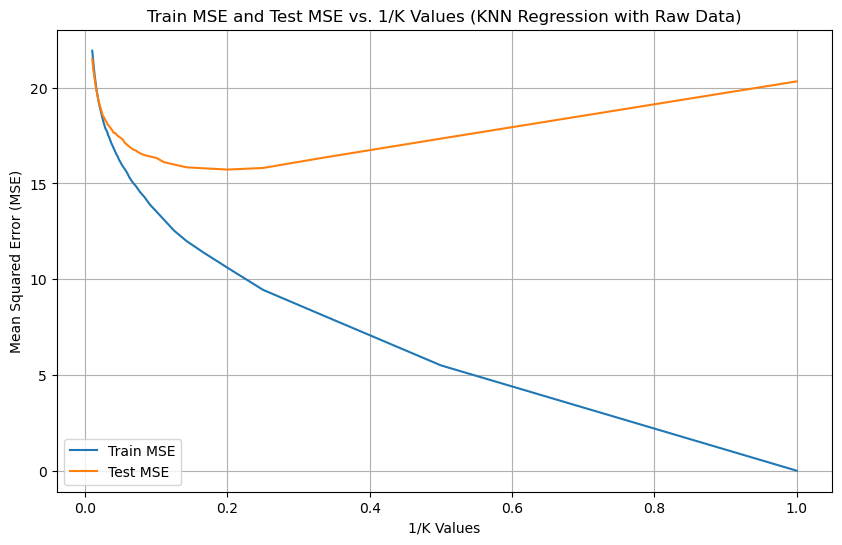

Optimal Testing K from Raw Data: 5 with Lowest MSE: 15.727
Optimal Training K from Raw Data: 1 with Lowest MSE: 0.000


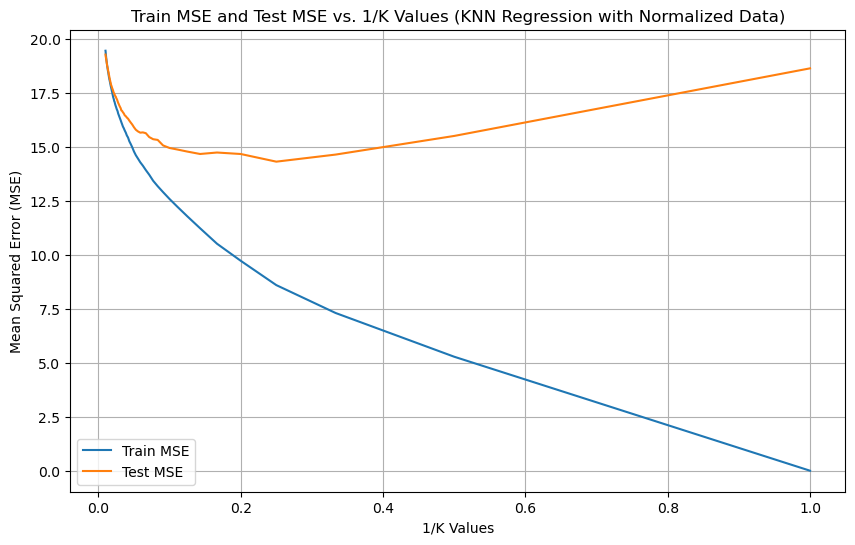

Optimal Testing K from Normalized Data: 4 with Lowest MSE: 14.306
Optimal Training K from Normalized Data: 1 with Lowest MSE: 0.000


In [22]:
from sklearn.neighbors import KNeighborsRegressor

# Create a function for plotting
def plot_print_mse(X_train, X_test, y_train, y_test, title_suffix=''):

    k_values = np.arange(1, 101)
    inv_k_values = 1/k_values
    tr_mse, te_mse = [], []

    for k in k_values:
        knn_model = KNeighborsRegressor(n_neighbors=k)
        knn_model.fit(X_train, y_train)
        tr_mse.append(mean_squared_error(y_train, knn_model.predict(X_train)))
        te_mse.append(mean_squared_error(y_test, knn_model.predict(X_test)))

    op_k_te = k_values[np.argmin(te_mse)]
    op_k_tr = k_values[np.argmin(tr_mse)]

    plt.figure(figsize=(10, 6))
    plt.plot(inv_k_values, tr_mse, label='Train MSE')
    plt.plot(inv_k_values, te_mse, label='Test MSE')
    plt.xlabel('1/K Values')  # Fixing the label to indicate 1/K
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title(f'Train MSE and Test MSE vs. 1/K Values (KNN Regression {title_suffix})')  # Fixing the title
    plt.legend()
    plt.grid(True)
    plt.show()

    return min(te_mse), min(tr_mse), op_k_te, op_k_tr

raw_best_te_mse, raw_best_tr_mse, op_k_te_raw, op_k_tr_raw = plot_print_mse(X_train, X_test, y_train, y_test, 'with Raw Data')
print(f'Optimal Testing K from Raw Data: {op_k_te_raw} with Lowest MSE: {raw_best_te_mse:.3f}')
print(f'Optimal Training K from Raw Data: {op_k_tr_raw} with Lowest MSE: {raw_best_tr_mse:.3f}')

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

normal_best_te_mse, normal_best_tr_mse, op_k_te_normal, op_k_tr_normal = plot_print_mse(X_train_scaled, X_test_scaled, y_train, y_test, 'with Normalized Data')
print(f'Optimal Testing K from Normalized Data: {op_k_te_normal} with Lowest MSE: {normal_best_te_mse:.3f}')
print(f'Optimal Training K from Normalized Data: {op_k_tr_normal} with Lowest MSE: {normal_best_tr_mse:.3f}')

### (j ) Compare KNN and Linear

In [23]:
# MSEs so far
# multi_mse, quad_mse_test, improved_mse_te, raw_best_te_mse, normal_best_te_mse.

data = {
    "Model": ["Multiple Regression", "Quadratic Regression", "Improved Model(last Iteration)", "KNN Model Raw", "KNN Model Normalized"],
    "MSE": [multi_mse, quad_mse_test, improved_mse_te, raw_best_te_mse, normal_best_te_mse]
}

comp_reg = pd.DataFrame(data)

comp_reg

,Model,MSE
0,Multiple Regression,20.767398
1,Quadratic Regression,18.647312
2,Improved Model(last Iteration),18.660040
3,KNN Model Raw,15.726820
4,KNN Model Normalized,14.305669


### By comparison of different regression models, KNN (with K=4) by using normalized dataset has the least test error (MSE). 

## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

### (b) The number of predictors p is extremely large, and the number of observations n is small.

### (c) The relationship between the predictors and response is highly non-linear.

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

### (b) What is our prediction with K = 1? Why?

### (c) What is our prediction with K = 3? Why?

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?